In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import xarray as xr

plt.rcParams['figure.figsize'] = (15, 7)


In [2]:
run_dir = "../output/stocks_daily/20220426_103942"

In [3]:
dataset = xr.open_dataarray(f"../data/stocks_daily/stocks_big_dataset_2022-0425.nc")
train_df = pd.read_csv(f"{run_dir}/train_log.csv")
test_df = pd.read_csv(f"{run_dir}/test_results.csv", parse_dates=['Unnamed: 0']).rename({'Unnamed: 0': 'time'}, axis=1)

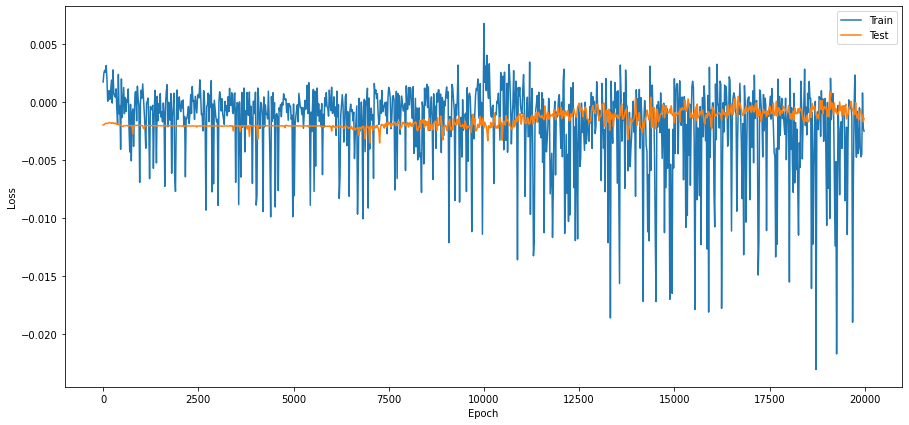

In [6]:
sns.lineplot(x='epoch', y='train_loss', data=train_df)
sns.lineplot(x='epoch', y='test_loss', data=train_df)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(labels=["Train", "Test"])

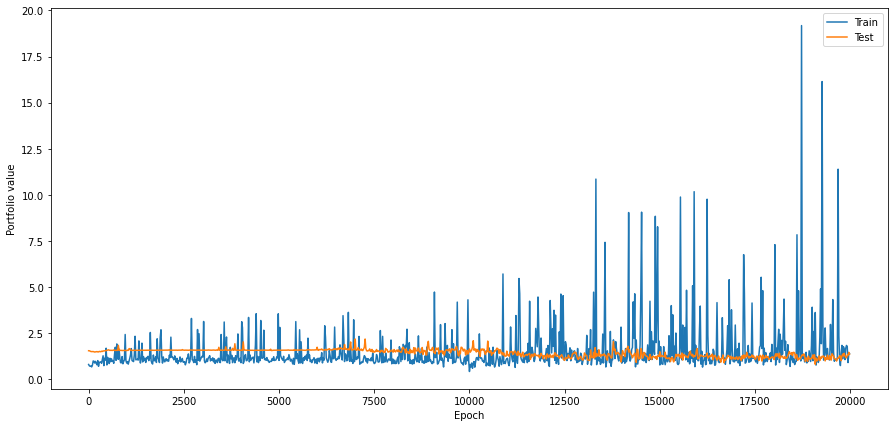

In [5]:
sns.lineplot(x='epoch', y='train_apv', data=train_df)
sns.lineplot(x='epoch', y='test_apv', data=train_df)
plt.ylabel('Portfolio value')
plt.xlabel('Epoch')
plt.legend(labels=["Train", "Test"])

In [7]:
best_epoch = train_df.iloc[np.argmax(train_df['test_apv'])]['epoch']

In [8]:
best_epoch

7261

Text(0, 0.5, 'Part of portfolio')

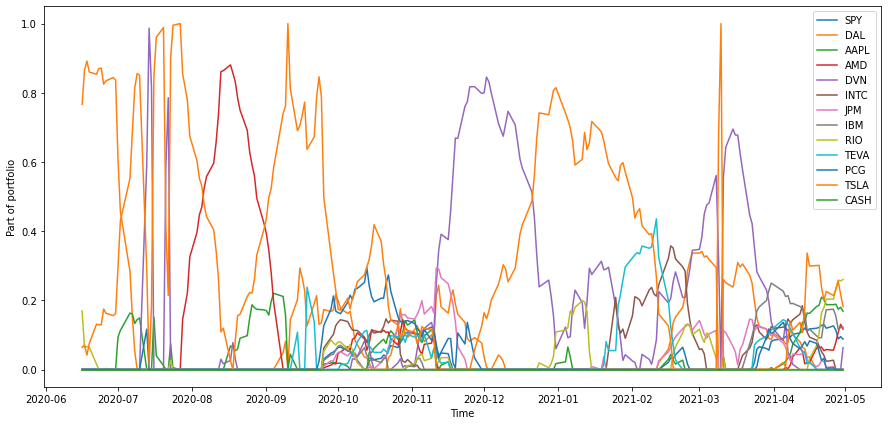

In [9]:
assets = [re.sub(r"^asset_", "", col) for col in test_df.columns if col.startswith('asset_')]
assets = list(filter(lambda asset: asset != "cash", assets)) + ['cash']

for asset in assets:
    sns.lineplot(x='time', y=f'asset_{asset}', data=test_df)
    
plt.legend(labels=[asset.upper() for asset in assets])
plt.xlabel('Time')
plt.ylabel('Part of portfolio')
    

Text(0, 0.5, 'Price change')

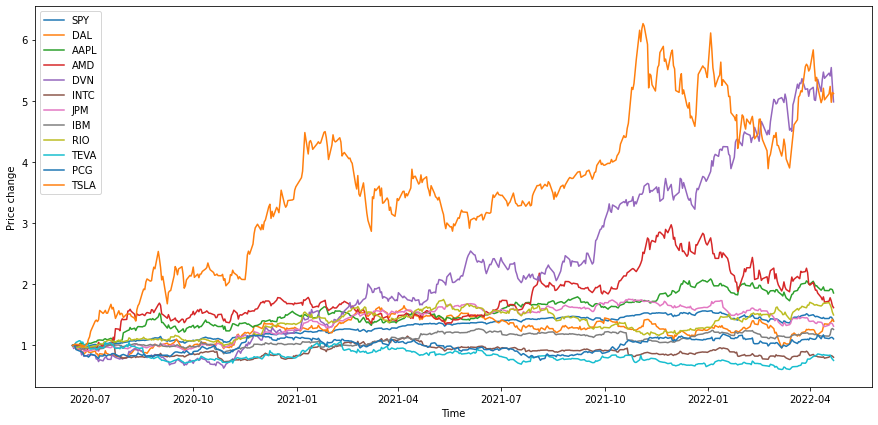

In [12]:
for asset in assets:
    if asset == "cash":
        continue
    asset_data = dataset.sel(asset=asset.upper(), feature='close').to_series()
    asset_data = asset_data[asset_data.index >= test_df['time'][0]]

    sns.lineplot(data=asset_data/asset_data[0])
    
    
plt.legend(labels=[asset.upper() for asset in assets if asset != "cash"])
plt.xlabel('Time')
plt.ylabel('Price change')


Text(0, 0.5, 'Price change')

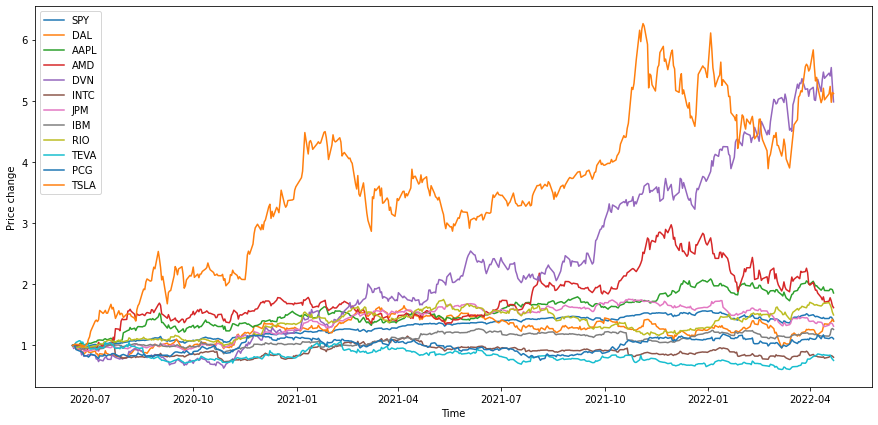

In [14]:
for asset in assets:
    if asset == "cash":
        continue
    asset_data = dataset.sel(asset=asset.upper(), feature='close').to_series()
    asset_data = asset_data[asset_data.index >= test_df['time'][0]]

    sns.lineplot(data=asset_data/asset_data[0])
    
    
plt.legend(labels=[asset.upper() for asset in assets if asset != "cash"])
plt.xlabel('Time')
plt.ylabel('Price change')

In [15]:
dataset

<xarray.DataArray (feature: 7, asset: 507, time: 5656)>
[20073144 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1999-11-01 1999-11-02 ... 2022-04-22
  * asset    (asset) object 'PARA' 'HES' 'RJF' 'BRK.B' ... 'OGN' 'QRVO' 'FB'
  * feature  (feature) object 'close' 'high' ... 'eps_surprise_percentage'

<AxesSubplot:xlabel='time', ylabel='Portfolio part'>

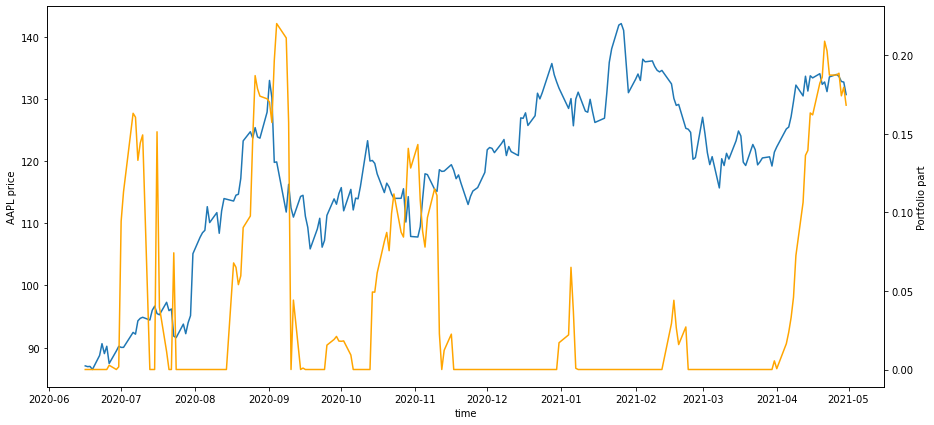

In [17]:
plt.figure(figsize=(15, 7))

asset = 'aapl'

asset_data = dataset.sel(asset=asset.upper(), feature='close').to_series()
asset_data = asset_data[(asset_data.index >= test_df['time'][0]) & (asset_data.index <= test_df['time'].iloc[-1])]

ax = sns.lineplot(data=asset_data)
plt.ylabel(f'{asset.upper()} price')
ax2 = ax.twinx()
plt.ylabel(f'Portfolio part')


sns.lineplot(x='time', y=test_df[f'asset_{asset}'], data=test_df, ax=ax2, color='orange')


<AxesSubplot:xlabel='time', ylabel='Price change'>

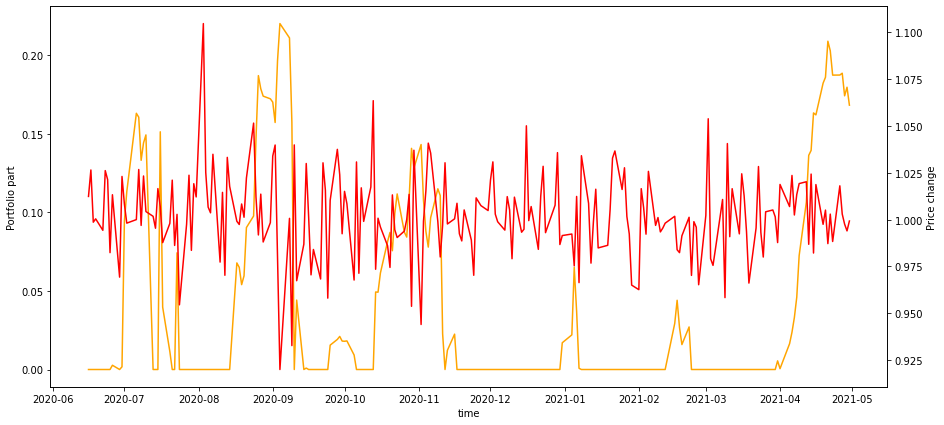

In [18]:
plt.figure(figsize=(15, 7))

ax = sns.lineplot(x='time', y=test_df[f'asset_{asset}'], data=test_df, color='orange')

plt.ylabel(f'Portfolio part')
ax2 = ax.twinx()
plt.ylabel(f'Price change')

sns.lineplot(x='time', y=test_df[f'price_change_{asset}'], data=test_df, ax=ax2, color='red')


<AxesSubplot:title={'center':'Our results vs S&P 500'}, xlabel='time', ylabel='portfolio_value'>

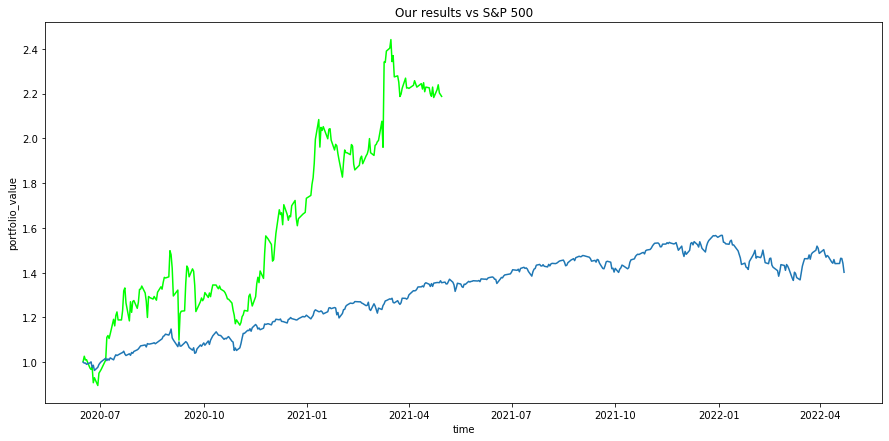

In [19]:
plt.figure(figsize=(15, 7))


asset = 'spy'

asset_data = dataset.sel(asset=asset.upper(), feature='close').to_series()
asset_data = asset_data[asset_data.index >= test_df['time'][0]]


plt.title('Our results vs S&P 500')
sns.lineplot(x='time', y='portfolio_value', data=test_df, color='lime')
sns.lineplot(data=asset_data/asset_data[0])
